# **Классификация победителя раунда в матче CS:GO**
## Предсказание команды-победителя (CT или T)

## Описание
> Имеется 82 014 наборов данных, каждый из которых указывает на определённое состояние раунда в матче по игре Counter-Strike: Global Offensive. Наборы данных состоят из ряда известных признаков, в том числе количество живых игроков обеих команд, общее количество их очков здоровья, наличие у них тех или иных вооружений. Также известен target, команда-победитель в раунде, со значением CT, если победила команда контр-террористов, и T если победила команда террористов.
Требуется построить модель, предсказывающую значение признака target для 40 396 состояний раундов из тестового набора данных.
Мерой точности является доля правильных ответов (Accuracy).

> Ссылка: https://www.kaggle.com/competitions/csgo-classification-ru/overview

## Оценка


> Мерой точности является доля правильных ответов:

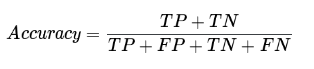



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np


In [ ]:
pd.reset_option('max_columns')

In [ ]:
url_sample_submission = "https://raw.githubusercontent.com/VsD-0/CS-GO-datasets/master/sample_submission.csv"
url_test = "https://raw.githubusercontent.com/VsD-0/CS-GO-datasets/master/test.csv"
url_train = "https://raw.githubusercontent.com/VsD-0/CS-GO-datasets/master/train.csv"

In [ ]:
data = pd.read_csv(url_sample_submission)

In [ ]:
train = pd.read_csv(url_train)

In [ ]:
test = pd.read_csv(url_test)

In [ ]:
data.head(20)

,id,target
0,1,CT
1,2,T
2,3,CT
3,4,T
4,5,CT
5,6,T
6,7,CT
7,8,T
8,9,CT
9,10,T


In [ ]:
train.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,de_mirage,False,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2.0,7.0,de_train,False,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,CT
7,74.91,0.0,2.0,de_dust2,False,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,T
8,94.90,9.0,13.0,de_nuke,False,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T
9,14.12,5.0,6.0,de_inferno,False,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T


In [ ]:
test.head(10)

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,...,2.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,...,2.0,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0
2,3,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,...,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,5,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,...,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,54.96,5.0,4.0,de_dust2,False,203.0,478.0,267.0,477.0,...,3.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
6,7,94.94,4.0,2.0,de_dust2,False,372.0,456.0,0.0,464.0,...,0.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0
7,8,162.39,11.0,9.0,de_inferno,False,500.0,500.0,200.0,430.0,...,0.0,5.0,2.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
8,9,94.91,12.0,14.0,de_train,False,473.0,478.0,494.0,494.0,...,2.0,2.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0
9,10,109.89,2.0,7.0,de_inferno,False,500.0,500.0,500.0,500.0,...,4.0,5.0,5.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0


In [ ]:
train.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [ ]:
test.columns

Index(['id', 'time_left', 'ct_score', 't_score', 'map', 'bomb_planted',
       'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money',
       'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive',
       't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug',
       't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon',
       't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto',
       'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas',
       't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1',
       'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock',
       't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s',
       't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10',
       't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd',
       't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9',
       't_weapon_mp9', 'ct_weapon_negev', 't_weapon_n

In [ ]:
test.shape

(40396, 97)

In [ ]:
train.shape

(82014, 97)

In [ ]:
data.shape

(40396, 2)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            40396 non-null  int64  
 1   time_left                     40396 non-null  float64
 2   ct_score                      40396 non-null  float64
 3   t_score                       40396 non-null  float64
 4   map                           40396 non-null  object 
 5   bomb_planted                  40396 non-null  bool   
 6   ct_health                     40396 non-null  float64
 7   t_health                      40396 non-null  float64
 8   ct_armor                      40396 non-null  float64
 9   t_armor                       40396 non-null  float64
 10  ct_money                      40396 non-null  float64
 11  t_money                       40396 non-null  float64
 12  ct_helmets                    40396 non-null  float64
 13  t

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40396 entries, 0 to 40395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40396 non-null  int64 
 1   target  40396 non-null  object
dtypes: int64(1), object(1)
memory usage: 631.3+ KB


In [ ]:
labelencoder = LabelEncoder()

In [ ]:
map_ = labelencoder.fit_transform(train["map"])
train["map_id"] = map_

In [ ]:
bomb_planted = labelencoder.fit_transform(train["bomb_planted"])
train["bomb_planted_id"] = bomb_planted

In [ ]:
target = labelencoder.fit_transform(train["target"])
train["target_id"] = target

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  

In [ ]:
train_float = train[['time_left', 'ct_score', 't_score', 'map_id', 'bomb_planted_id', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
       'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
       't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
       'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang', 'ct_grenade_smokegrenade',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade', 'target_id']]

In [ ]:
train_float.head(10)

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
0,114.95,4.0,0.0,2,0,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0
1,114.92,7.0,4.0,1,0,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,1
2,74.88,4.0,6.0,5,0,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0
3,21.46,1.0,1.0,4,1,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,175.00,9.0,6.0,3,0,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,66.88,5.0,1.0,3,0,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,94.89,2.0,7.0,6,0,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0
7,74.91,0.0,2.0,1,0,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1
8,94.90,9.0,13.0,4,0,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,14.12,5.0,6.0,2,0,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
train_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map_id                        82014 non-null  int64  
 4   bomb_planted_id               82014 non-null  int64  
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

<Axes: >

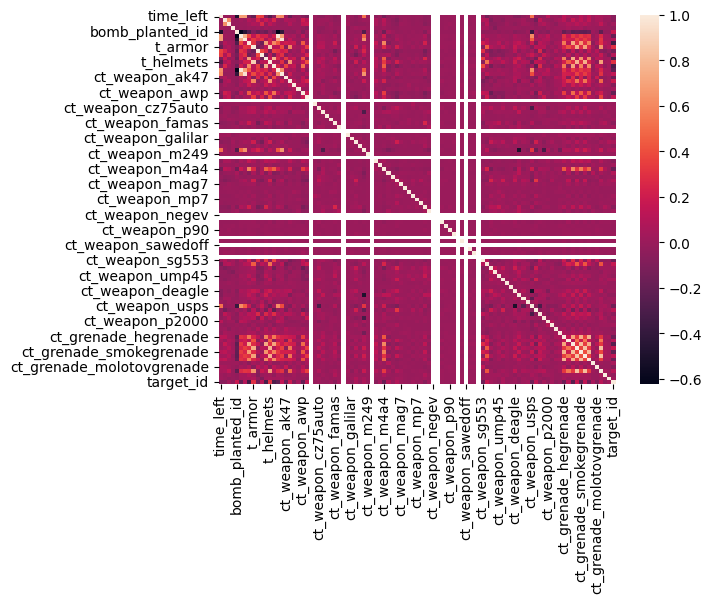

In [ ]:
sns.heatmap(train_float.corr())

Кегле, общее кол-во, избыточность, хит-мап

In [ ]:
for i in train_float.columns:
    print(i, (train_float['target_id'].corr(train_float[i])))

time_left -0.06671271650519539
ct_score -0.058478507473251826
t_score 0.026279309007500314
map_id -0.03615784590782006
bomb_planted_id 0.18118636286790304
ct_health -0.18805352050339824
t_health 0.09455411598042786
ct_armor -0.33361391471351287
t_armor 0.2905685602445799
ct_money -0.12932094714506698
t_money 0.09919242156712026
ct_helmets -0.30613175333329146
t_helmets 0.29835671810441594
ct_defuse_kits -0.29066331980952076
ct_players_alive -0.21424481675729462
t_players_alive 0.14576455482607537
ct_weapon_ak47 -0.16718072560508812
t_weapon_ak47 0.19189416686767183
ct_weapon_aug -0.08025183801278665
t_weapon_aug 0.03522457904404028
ct_weapon_awp -0.19885570034821134
t_weapon_awp 0.14920106763104848
ct_weapon_bizon nan
t_weapon_bizon 0.0022812962005159428
ct_weapon_cz75auto 0.012903462535854816
t_weapon_cz75auto -0.011563622979784713
ct_weapon_elite -0.016926246184658548
t_weapon_elite 0.01158928174055509
ct_weapon_famas -0.04953185795893224
t_weapon_famas 0.03734648789278699
ct_weapon_

In [ ]:
train_float_copy = train_float.copy(deep=True)
train_float_copy.drop(columns=['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249',
                                'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_r8revolver',
                                't_weapon_scar20', 'ct_weapon_sawedoff'], inplace=True)

In [ ]:
for i in train_float_copy.columns:
    print(i, (train_float_copy['target_id'].corr(train_float_copy[i])))

time_left -0.06671271650519539
ct_score -0.058478507473251826
t_score 0.026279309007500314
map_id -0.03615784590782006
bomb_planted_id 0.18118636286790304
ct_health -0.18805352050339824
t_health 0.09455411598042786
ct_armor -0.33361391471351287
t_armor 0.2905685602445799
ct_money -0.12932094714506698
t_money 0.09919242156712026
ct_helmets -0.30613175333329146
t_helmets 0.29835671810441594
ct_defuse_kits -0.29066331980952076
ct_players_alive -0.21424481675729462
t_players_alive 0.14576455482607537
ct_weapon_ak47 -0.16718072560508812
t_weapon_ak47 0.19189416686767183
ct_weapon_aug -0.08025183801278665
t_weapon_aug 0.03522457904404028
ct_weapon_awp -0.19885570034821134
t_weapon_awp 0.14920106763104848
t_weapon_bizon 0.0022812962005159428
ct_weapon_cz75auto 0.012903462535854816
t_weapon_cz75auto -0.011563622979784713
ct_weapon_elite -0.016926246184658548
t_weapon_elite 0.01158928174055509
ct_weapon_famas -0.04953185795893224
t_weapon_famas 0.03734648789278699
t_weapon_g3sg1 0.0044203430553

In [ ]:
values_list = []
for i in train_float_copy.columns:
    values_list.append(train_float_copy['target_id'].corr(train_float_copy[i]))
corr_dict = dict(zip(train_float_copy.columns, values_list))
sorted_ = sorted(corr_dict.items(), key=lambda item: item[1])
sorted_[::-1]

[('target_id', 1.0),
 ('t_helmets', 0.29835671810441594),
 ('t_armor', 0.2905685602445799),
 ('t_weapon_ak47', 0.19189416686767183),
 ('bomb_planted_id', 0.18118636286790304),
 ('t_grenade_flashbang', 0.16892176720953017),
 ('t_weapon_sg553', 0.16628527475874239),
 ('t_weapon_awp', 0.14920106763104848),
 ('t_players_alive', 0.14576455482607537),
 ('t_grenade_smokegrenade', 0.14190749140708772),
 ('t_weapon_usps', 0.1361938041320686),
 ('t_grenade_molotovgrenade', 0.1176608007683335),
 ('t_grenade_hegrenade', 0.11589134288504714),
 ('t_money', 0.09919242156712026),
 ('t_health', 0.09455411598042786),
 ('t_weapon_mac10', 0.09028433315785031),
 ('t_weapon_m4a4', 0.08942169730983499),
 ('t_weapon_glock', 0.07272413623432236),
 ('t_weapon_galilar', 0.06676013237992878),
 ('t_weapon_ump45', 0.065830442765278),
 ('t_grenade_incendiarygrenade', 0.052168119447230245),
 ('t_weapon_p250', 0.043992140540360644),
 ('ct_weapon_ssg08', 0.04097036992901698),
 ('t_weapon_fiveseven', 0.03827741829784049

In [ ]:
ct =  train_float_copy.copy(deep=True)
ct.loc[ct['target_id'] == 0, 'target_id'] = 3
ct.loc[ct['target_id'] == 1, 'target_id'] = 0
ct.loc[ct['target_id'] == 3, 'target_id'] = 1
ct.head(10)

,time_left,ct_score,t_score,map_id,bomb_planted_id,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target_id
0,114.95,4.0,0.0,2,0,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,1
1,114.92,7.0,4.0,1,0,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0
2,74.88,4.0,6.0,5,0,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,1
3,21.46,1.0,1.0,4,1,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,175.00,9.0,6.0,3,0,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,66.88,5.0,1.0,3,0,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,94.89,2.0,7.0,6,0,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,1
7,74.91,0.0,2.0,1,0,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0
8,94.90,9.0,13.0,4,0,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9,14.12,5.0,6.0,2,0,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
values_list_ct = []
for i in ct.columns:
    values_list_ct.append(ct['target_id'].corr(ct[i]))
corr_dict_ct = dict(zip(ct.columns, values_list_ct))
sorted_ct = sorted(corr_dict_ct.items(), key=lambda item: item[1])
sorted_ct[::-1]

[('target_id', 1.0),
 ('ct_armor', 0.3336139147135128),
 ('ct_helmets', 0.3061317533332915),
 ('ct_defuse_kits', 0.29066331980952),
 ('ct_grenade_flashbang', 0.25168626696168667),
 ('ct_players_alive', 0.2142448167572945),
 ('ct_grenade_smokegrenade', 0.2070285949916689),
 ('ct_weapon_awp', 0.19885570034821137),
 ('ct_health', 0.18805352050339824),
 ('ct_weapon_m4a4', 0.17690967538363922),
 ('ct_weapon_ak47', 0.16718072560508812),
 ('ct_grenade_incendiarygrenade', 0.16594630920716977),
 ('ct_grenade_hegrenade', 0.16483423660470073),
 ('ct_weapon_sg553', 0.16182011116258724),
 ('ct_weapon_usps', 0.15099982607214327),
 ('ct_money', 0.12932094714506698),
 ('ct_grenade_molotovgrenade', 0.08194617193275033),
 ('ct_weapon_aug', 0.08025183801278668),
 ('time_left', 0.06671271650519535),
 ('ct_weapon_mp9', 0.06162018749395348),
 ('ct_score', 0.05847850747325179),
 ('ct_weapon_m4a1s', 0.05163553649600695),
 ('ct_weapon_p250', 0.05038654358800155),
 ('ct_weapon_famas', 0.049531857958932196),
 ('

In [ ]:
list_columns = []
for key in corr_dict:
  if corr_dict[key] > 0.05:
    list_columns.append(key)
positive_corr_train = train_float_copy[list_columns]
positive_corr_train.head(10)

,bomb_planted_id,t_health,t_armor,t_money,t_helmets,t_players_alive,t_weapon_ak47,t_weapon_awp,t_weapon_galilar,t_weapon_glock,...,t_weapon_mac10,t_weapon_sg553,t_weapon_ump45,t_weapon_usps,t_grenade_hegrenade,t_grenade_flashbang,t_grenade_smokegrenade,t_grenade_incendiarygrenade,t_grenade_molotovgrenade,target_id
0,0,500.0,400.0,10200.0,2.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0
1,0,500.0,500.0,13950.0,5.0,5.0,4.0,1.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,5.0,5.0,0.0,5.0,1
2,0,200.0,200.0,7200.0,2.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0
3,1,268.0,385.0,1750.0,4.0,4.0,3.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1
4,0,500.0,300.0,650.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
5,0,233.0,95.0,6400.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0,480.0,499.0,2800.0,5.0,5.0,3.0,1.0,0.0,5.0,...,0.0,1.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0
7,0,180.0,187.0,7600.0,2.0,2.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1
8,0,400.0,364.0,11850.0,4.0,4.0,3.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1
9,0,349.0,478.0,1450.0,5.0,5.0,0.0,0.0,0.0,4.0,...,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
